In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cle = pd.read_csv('/content/heart.csv')

In [97]:
data = pd.concat([cle])
data.head()

data.shape

(1025, 14)

In [98]:

data.isnull().sum().sum()

(data.values == '?').sum()

data = data.replace('?', np.nan)
data = data.dropna()

In [99]:
data.shape

(1025, 14)

<ipython-input-100-98ed0369f20f>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


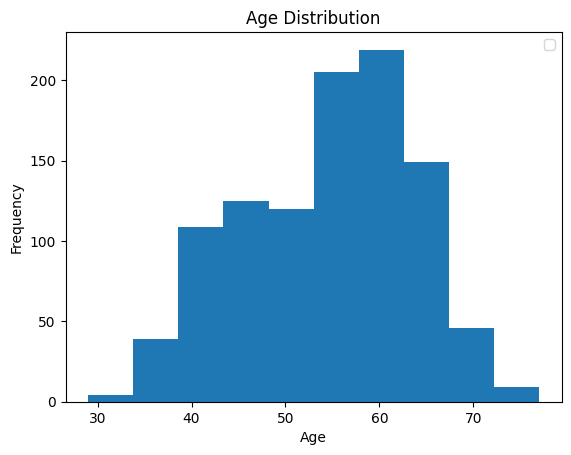

In [100]:
plt.figure()
plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.title('Age Distribution')
plt.show()

<ipython-input-101-b1e01266908a>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


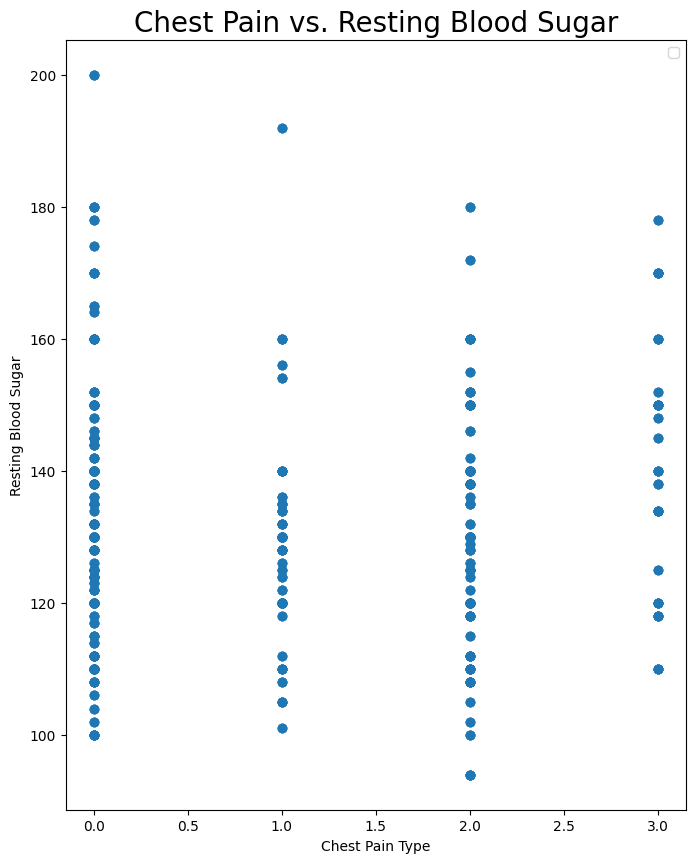

In [101]:
plt.figure(figsize=(8,10))
plt.scatter(x= data['cp'], y=data['trestbps'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Resting Blood Sugar')
plt.title('Chest Pain vs. Resting Blood Sugar', size=20)
plt.legend()
plt.show()

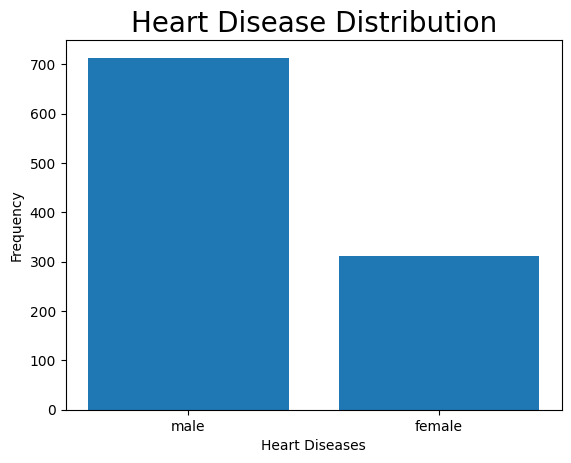

In [102]:
maleP = data[data['sex'] == 1]
plt.figure()
plt.bar(["male", "female"], height=[len(maleP), len(data) - len(maleP)] )
plt.xlabel('Heart Diseases')
plt.ylabel('Frequency')
plt.title('Heart Disease Distribution', size=20)
plt.show()

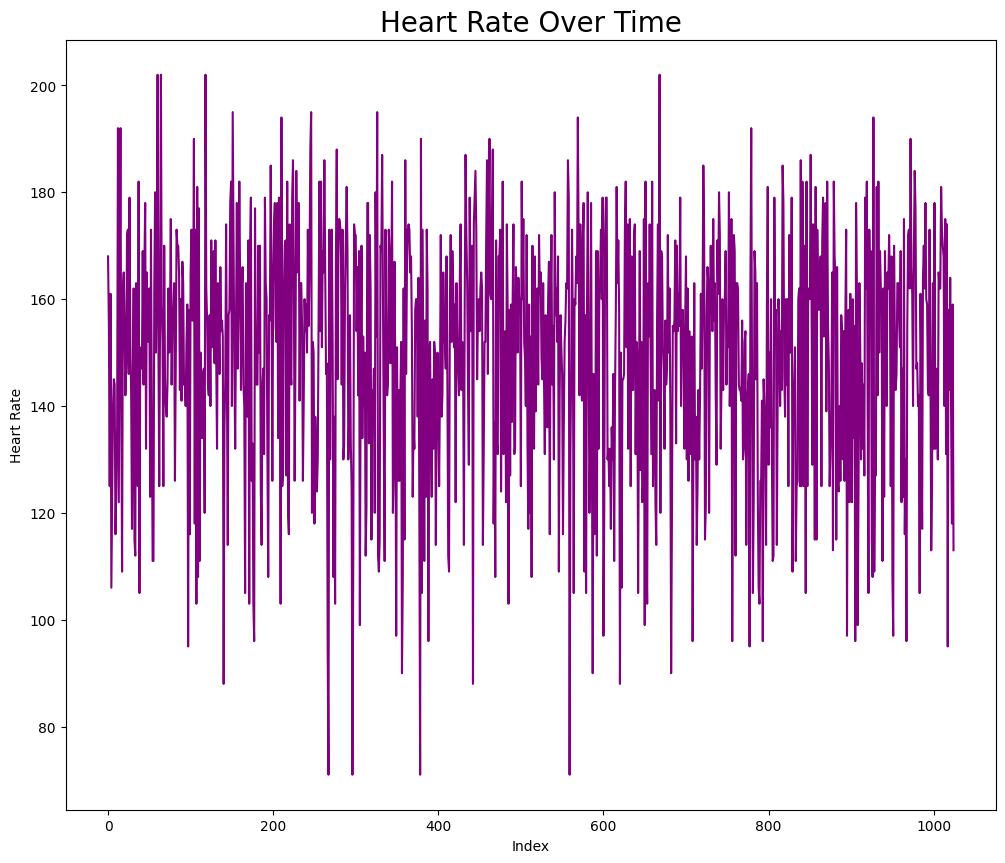

In [103]:
plt.figure(figsize=(12, 10))
plt.plot(data['thalach'], color='purple')
plt.xlabel('Index')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Over Time', size=20)
plt.show()

In [105]:
df = pd.read_csv('/content/heart.csv')

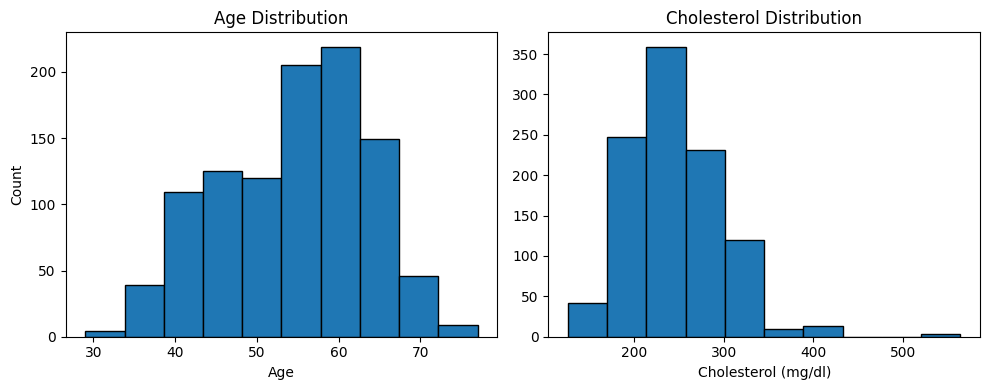

In [124]:
# Standard histogram of two features side by side
fig, axes = plt.subplots(1,2,figsize=(10, 4), tight_layout=True)

# Age distribution
axes[0].hist(df['age'],edgecolor='black')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Cholesterol distribution
axes[1].hist(df['chol'],edgecolor='black')
axes[1].set_title('Cholesterol Distribution')
axes[1].set_xlabel('Cholesterol (mg/dl)')
plt.show()


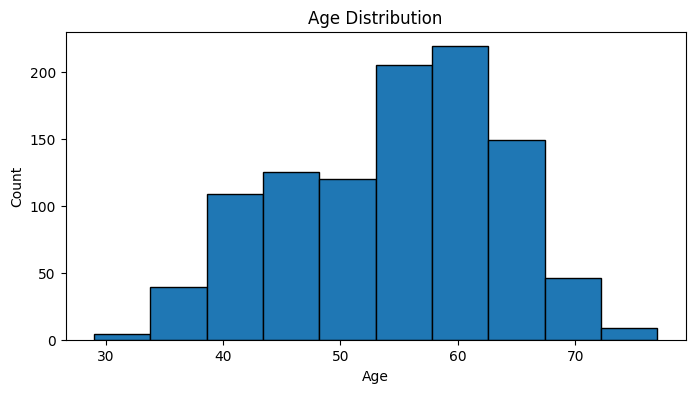

In [130]:
plt.figure(figsize=(8, 4))
plt.hist(df['age'], edgecolor='black')            # histogram of ages in 10 bins
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


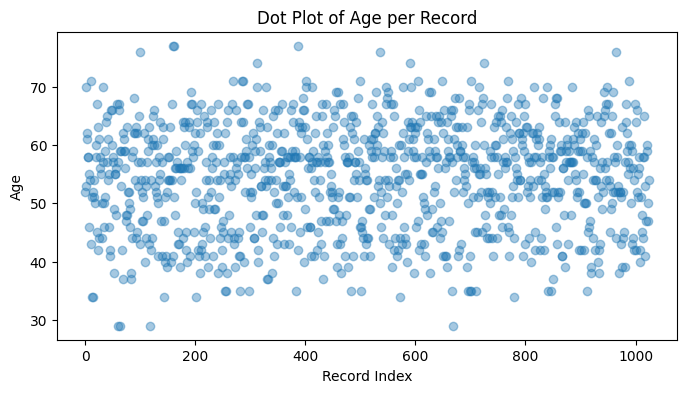

In [149]:
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['age'],
         linestyle='', marker='o', alpha=0.4)  # dots only, no line
plt.title('Dot Plot of Age per Record')
plt.xlabel('Record Index')
plt.ylabel('Age')
plt.show()


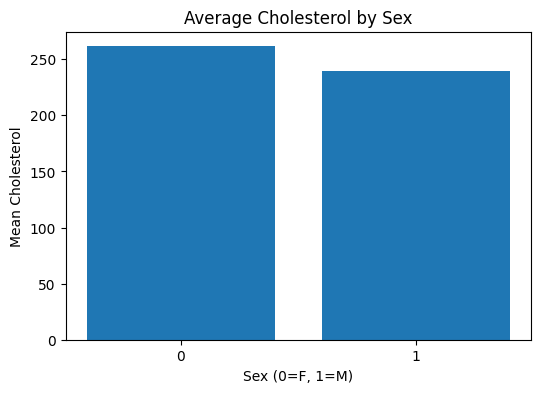

In [142]:
# compute means
mens = df[df['sex'] == 1]
means = df.groupby('sex')['chol'].mean()

plt.figure(figsize=(6, 4))
plt.bar(means.index.astype(str), means.values)   # bars at x=‘0’,‘1’
plt.title('Average Cholesterol by Sex')
plt.xlabel('Sex (0=F, 1=M)')
plt.ylabel('Mean Cholesterol')
plt.show()


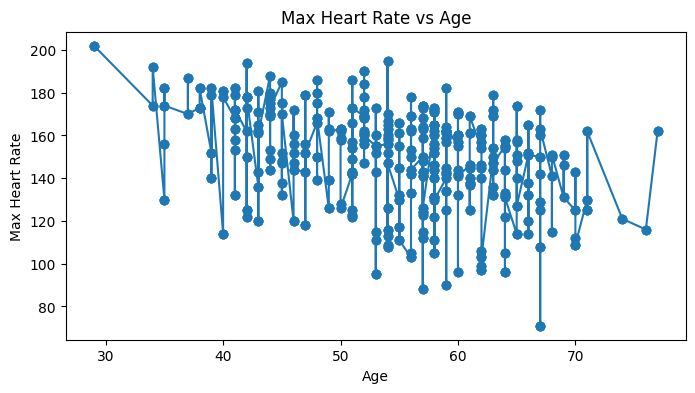

In [150]:
# sort by age so the line makes sense
df_sorted = df.sort_values('age')

plt.figure(figsize=(8, 4))
plt.plot(df_sorted['age'], df_sorted['thalach'],
         marker='o', linestyle='-')  # points connected by line
plt.title('Max Heart Rate vs Age')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.show()


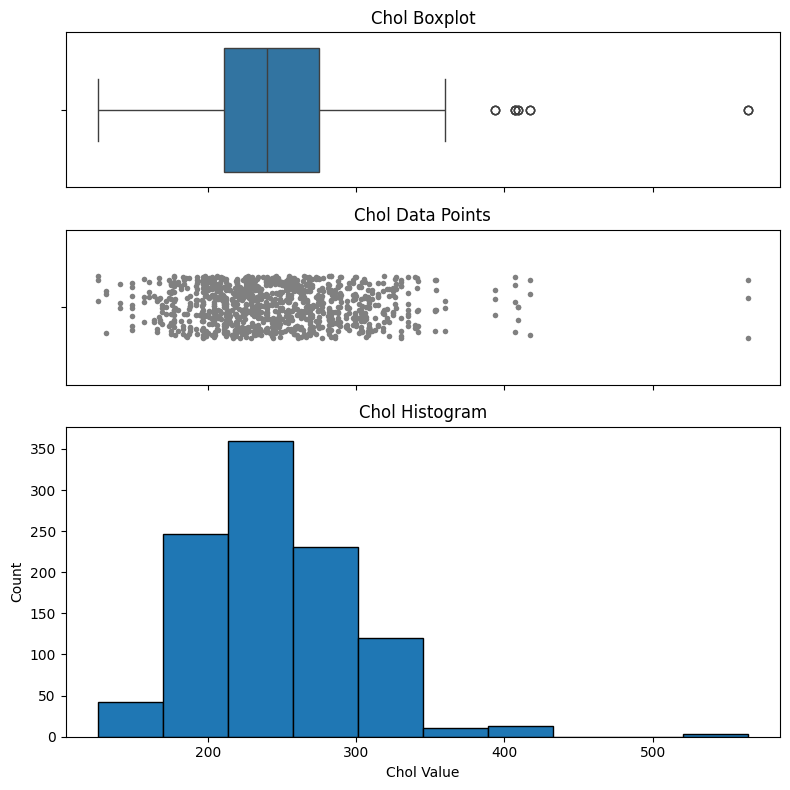

In [156]:
feature = 'chol'
data = df[feature].dropna()

fig, (ax_box, ax_scatter, ax_hist) = plt.subplots(
    3, 1,
    figsize=(8, 8),
    gridspec_kw={'height_ratios': [1, 1, 2]},
    sharex=True,
    tight_layout=True
)

# 1. Boxplot
sns.boxplot(x=data, ax=ax_box)
ax_box.set_title(f'{feature.capitalize()} Boxplot')

# 2. Jittered scatter (strip) for individual points
sns.stripplot(x=data, ax=ax_scatter, color='gray', size=4, jitter=0.2)
ax_scatter.set_title(f'{feature.capitalize()} Data Points')

# 3. Histogram
ax_hist.hist(data, bins=10, edgecolor='black')
ax_hist.set_title(f'{feature.capitalize()} Histogram')
ax_hist.set_xlabel(f'{feature.capitalize()} Value')
ax_hist.set_ylabel('Count')

plt.show()


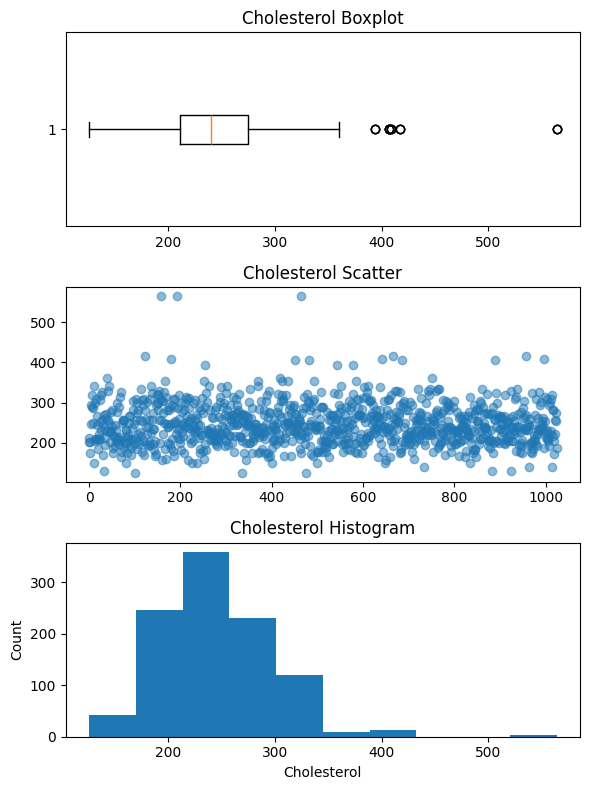

In [157]:
plt.figure(figsize=(6, 8))

# 1) Boxplot at top
plt.subplot(3, 1, 1)
plt.boxplot(df['chol'], vert=False)
plt.title('Cholesterol Boxplot')

# 2) Scatter in middle
plt.subplot(3, 1, 2)
plt.scatter(range(len(df)), df['chol'], alpha=0.5)
plt.title('Cholesterol Scatter')

# 3) Histogram at bottom
plt.subplot(3, 1, 3)
plt.hist(df['chol'], bins=10)
plt.title('Cholesterol Histogram')
plt.xlabel('Cholesterol')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


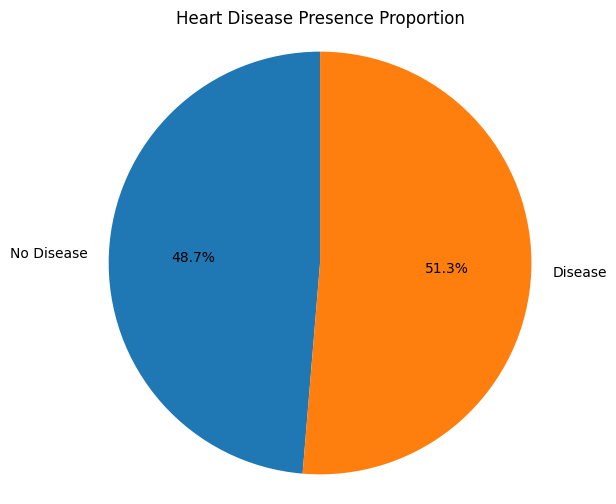

In [159]:
# Prepare data
counts = df['target'].value_counts().sort_index()  # index 0=no disease, 1=disease
labels = ['No Disease', 'Disease']

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease Presence Proportion')
plt.axis('equal')  # make it a circle
plt.show()


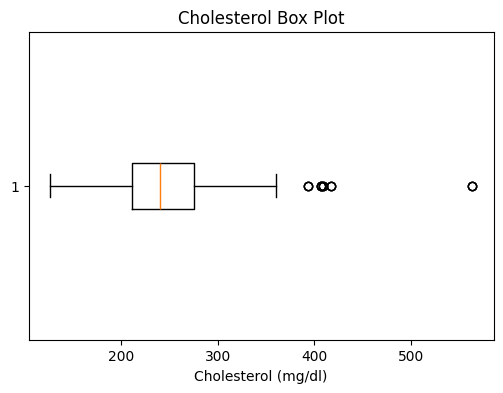

In [161]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['chol'], vert=False)   # horizontal boxplot of cholesterol
plt.title('Cholesterol Box Plot')
plt.xlabel('Cholesterol (mg/dl)')
plt.show()


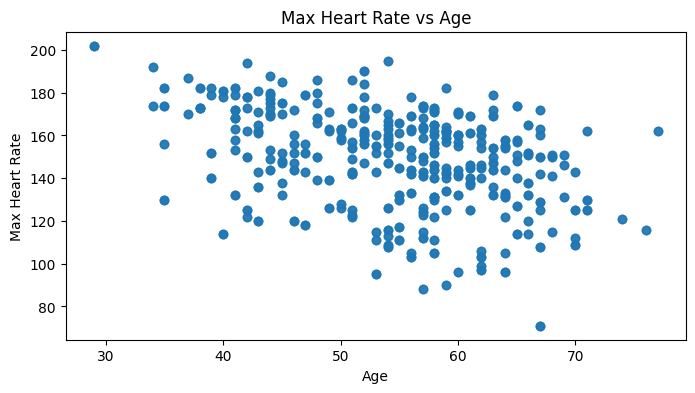

In [163]:
plt.figure(figsize=(8, 4))
plt.scatter(df['age'], df['thalach'], alpha=0.6)
plt.title('Max Heart Rate vs Age')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.show()


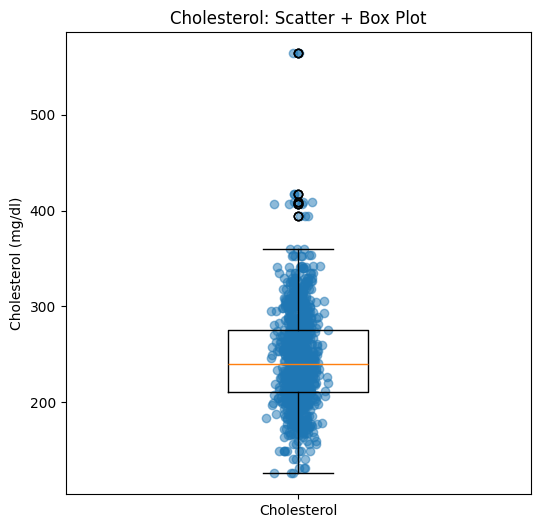

In [164]:
# Jitter x-values slightly so points don’t all overlap at x=1
x = np.ones(len(df)) + np.random.normal(0, 0.02, size=len(df))

plt.figure(figsize=(6, 6))

# Scatter of cholesterol
plt.scatter(x, df['chol'], alpha=0.5, label='Data Points')

# Overlay boxplot at x=1
plt.boxplot(df['chol'], positions=[1], widths=0.3, notch=False)

plt.title('Cholesterol: Scatter + Box Plot')
plt.xticks([1], ['Cholesterol'])
plt.ylabel('Cholesterol (mg/dl)')
plt.legend().remove()   # legend not needed here
plt.show()
